# Data Preprocessing Tools

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
# from sklearn.decomposition import PCA
from transformers import BertTokenizer, BertModel, AutoTokenizer, AutoModel
import torch 
from sklearn.model_selection import train_test_split
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import gensim
# from gensim.models import Word2Vec
from sentence_transformers import SentenceTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics.pairwise import cosine_similarity

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Importing the dataset

In [2]:
dataset = pd.read_csv('potential-talents - Aspiring human resources - seeking human resources.csv')
X = dataset.iloc[:, :-1]

In [3]:
print(X.shape)
print(X.dtypes)

(104, 4)
id             int64
job_title     object
location      object
connection    object
dtype: object


## Histograming

<Axes: title={'center': 'Connections'}, ylabel='Frequency'>

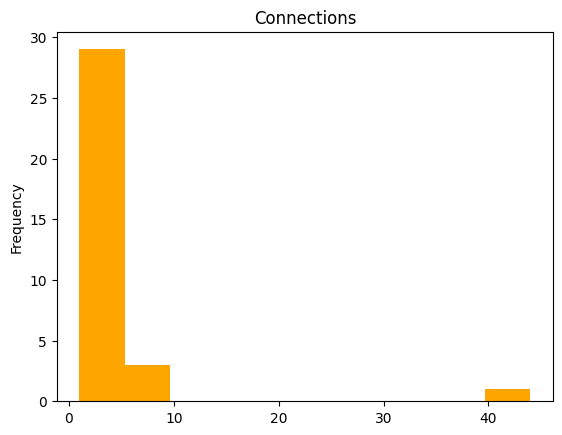

In [4]:
X['connection'].value_counts().plot(kind='hist',color="orange", title= 'Connections')

<Axes: title={'center': 'Location'}, ylabel='Frequency'>

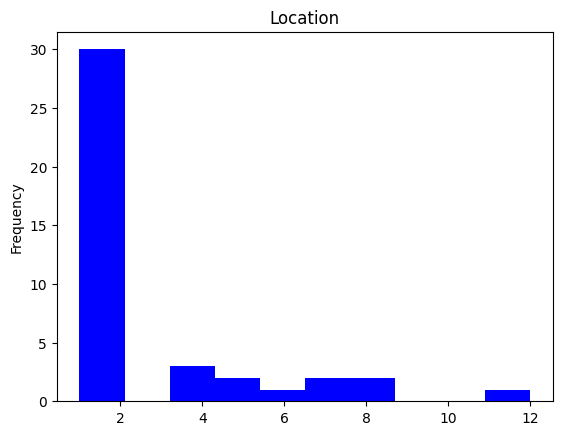

In [5]:
X['location'].value_counts().plot(kind='hist',color="blue", title= 'Location')

<Axes: title={'center': 'Job_Title'}, xlabel='related sentences', ylabel='Frequency'>

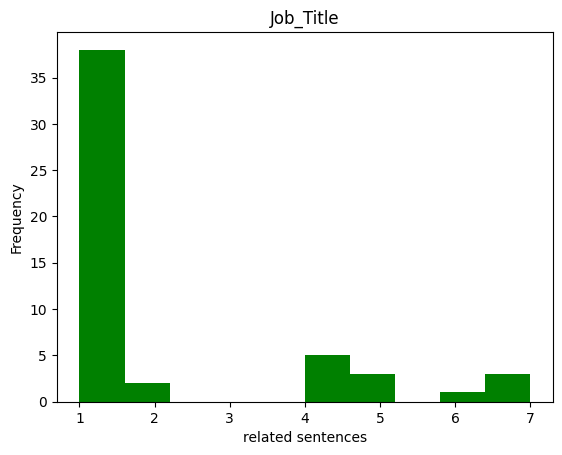

In [6]:
X['job_title'].value_counts().plot(kind='hist', color="green", xlabel= 'related sentences', title= 'Job_Title')

## Encoding categorical data

### Converting connection Column into Integer

In [7]:
X['connection']= X['connection'].str.rstrip('+ ')
X['connection'] = X['connection'].astype('Int64')
print(X['connection'].describe)

<bound method NDFrame.describe of 0       85
1      500
2       44
3      500
4      500
      ... 
99     103
100    500
101     49
102    500
103    500
Name: connection, Length: 104, dtype: Int64>


In [8]:
X['embedding_Score'] = 0
X['similarity_BERT'] = 0

In [9]:
print(X)

      id                                          job_title   
0      1  2019 C.T. Bauer College of Business Graduate (...  \
1      2  Native English Teacher at EPIK (English Progra...   
2      3              Aspiring Human Resources Professional   
3      4             People Development Coordinator at Ryan   
4      5    Advisory Board Member at Celal Bayar University   
..   ...                                                ...   
99   100  Aspiring Human Resources Manager | Graduating ...   
100  101              Human Resources Generalist at Loparex   
101  102   Business Intelligence and Analytics at Travelers   
102  103                     Always set them up for Success   
103  104   Director Of Administration at Excellence Logging   

                                location  connection  embedding_Score   
0                         Houston, Texas          85                0  \
1                                 Kanada         500                0   
2    Raleigh-Durham, Nor

### Tokenization and Word Embedding

## Using BERT

In [10]:
model = SentenceTransformer('bert-base-nli-mean-tokens')

# Encode the sentences
embeddings = model.encode(X['job_title']).tolist()

In [11]:
embeding_score = []

for e in range(0, len(embeddings)-1):
    embeding_score.append(embeddings)
    X['embedding_Score'] = embeding_score[e]

print(X['embedding_Score'])

0      [-0.8347964882850647, 0.7061930298805237, 1.41...
1      [-1.104153037071228, 0.6818210482597351, 0.480...
2      [0.4692794978618622, 0.2829475402832031, 2.330...
3      [-0.6027137041091919, -0.19602404534816742, 1....
4      [-0.05547791346907616, -0.19447150826454163, 1...
                             ...                        
99     [-0.5095097422599792, 0.2794761657714844, 1.60...
100    [0.27189913392066956, 0.062046267092227936, 1....
101    [-0.5368144512176514, 0.6071473360061646, 1.69...
102    [0.12111365050077438, -0.07036973536014557, 2....
103    [-0.9533588886260986, 0.9029402136802673, 1.01...
Name: embedding_Score, Length: 104, dtype: object


In [12]:

X['sentence1'] = "aspiring human resources"
X['sentence2'] = "seeking human resources"
embeddings1 = model.encode(X['sentence1']).tolist()
embeddings2 = model.encode(X['sentence2']).tolist()
# print(len(embeddings1))

In [13]:
embeding_score1 = []
embeding_score2 = []

for j in range(0, len(X['sentence1'])-1):
    embeding_score1.append(embeddings1)
    X['embedding_Score1'] = embeding_score1[j]

for em in range(0, len(X['sentence2'])-1):
    embeding_score2.append(embeddings2)
    X['embedding_Score2'] = embeding_score2[em]


print(X)

      id                                          job_title   
0      1  2019 C.T. Bauer College of Business Graduate (...  \
1      2  Native English Teacher at EPIK (English Progra...   
2      3              Aspiring Human Resources Professional   
3      4             People Development Coordinator at Ryan   
4      5    Advisory Board Member at Celal Bayar University   
..   ...                                                ...   
99   100  Aspiring Human Resources Manager | Graduating ...   
100  101              Human Resources Generalist at Loparex   
101  102   Business Intelligence and Analytics at Travelers   
102  103                     Always set them up for Success   
103  104   Director Of Administration at Excellence Logging   

                                location  connection   
0                         Houston, Texas          85  \
1                                 Kanada         500   
2    Raleigh-Durham, North Carolina Area          44   
3                  

In [14]:
cosine_similarities = []

for i in range (len(X['embedding_Score'])): 
    similarity = cosine_similarity([X['embedding_Score1'][i]],[X['embedding_Score'][i]])[0][0]
    cosine_similarities.append(similarity)
    X['similarity_BERT'][i] = cosine_similarities[i]

/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_10224/3040175249.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['similarity_BERT'][i] = cosine_similarities[i]


In [15]:
print(X['similarity_BERT'])

0      0.497849
1      0.372279
2      0.927214
3      0.705831
4      0.463202
         ...   
99     0.500861
100    0.609300
101    0.455116
102    0.618959
103    0.488341
Name: similarity_BERT, Length: 104, dtype: float64


In [16]:
X['similarity2_BERT'] = 0
cosine_similarities2 = []

for i in range (len(X['embedding_Score'])): 
    similarity2 = cosine_similarity([X['embedding_Score2'][i]],[X['embedding_Score'][i]])[0][0]
    cosine_similarities2.append(similarity2)
    X['similarity2_BERT'][i] = cosine_similarities2[i]

/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_10224/3124447512.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['similarity2_BERT'][i] = cosine_similarities2[i]


In [17]:
print(X['similarity2_BERT'])

0      0.220571
1      0.324733
2      0.709421
3      0.668772
4      0.468543
         ...   
99     0.241682
100    0.650529
101    0.436132
102    0.488246
103    0.410908
Name: similarity2_BERT, Length: 104, dtype: float64


## Using Word2Vec

In [18]:
word2vec_model = SentenceTransformer('average_word_embeddings_glove.6B.300d')


In [29]:
embedding_wv = word2vec_model.encode(X['job_title'])

In [32]:
X['embedding_Score_wv'] = 0
embeding_score_wv = []

for e in range(len(embedding_wv)):
    embeding_score_wv.append(embedding_wv)
    X['embedding_Score_wv'] = embeding_score_wv[e]

print(X['embedding_Score_wv'])

0      0.093231
1     -0.430001
2      0.061948
3     -0.134763
4      0.047350
         ...   
99    -0.088557
100   -0.026136
101   -0.209735
102   -0.047525
103    0.116464
Name: embedding_Score_wv, Length: 104, dtype: float32


In [33]:
embedding_wv1 = word2vec_model.encode(X['sentence1'])
embedding_wv2 = word2vec_model.encode(X['sentence2'])


In [35]:
X['embedding_Score_wv1'] = 0
X['embedding_Score_wv2'] = 0

embeding_score_wv1 = []
embeding_score_wv2 = []

for v in range(len(X['sentence1'])):
    embeding_score_wv1.append(embedding_wv1)
    X['embedding_Score_wv1'] = embeding_score_wv1[v]

for w in range(len(X['sentence2'])):
    embeding_score_wv2.append(embedding_wv2)
    X['embedding_Score_wv2'] = embeding_score_wv2[w]


print(X)

      id                                          job_title   
0      1  2019 C.T. Bauer College of Business Graduate (...  \
1      2  Native English Teacher at EPIK (English Progra...   
2      3              Aspiring Human Resources Professional   
3      4             People Development Coordinator at Ryan   
4      5    Advisory Board Member at Celal Bayar University   
..   ...                                                ...   
99   100  Aspiring Human Resources Manager | Graduating ...   
100  101              Human Resources Generalist at Loparex   
101  102   Business Intelligence and Analytics at Travelers   
102  103                     Always set them up for Success   
103  104   Director Of Administration at Excellence Logging   

                                location  connection   
0                         Houston, Texas          85  \
1                                 Kanada         500   
2    Raleigh-Durham, North Carolina Area          44   
3                  

In [44]:
np.array((X['embedding_Score_wv1'])).reshape(1,-1)

array([[0.07597267, 0.07597267, 0.07597267, 0.07597267, 0.07597267,
        0.07597267, 0.07597267, 0.07597267, 0.07597267, 0.07597267,
        0.07597267, 0.07597267, 0.07597267, 0.07597267, 0.07597267,
        0.07597267, 0.07597267, 0.07597267, 0.07597267, 0.07597267,
        0.07597267, 0.07597267, 0.07597267, 0.07597267, 0.07597267,
        0.07597267, 0.07597267, 0.07597267, 0.07597267, 0.07597267,
        0.07597267, 0.07597267, 0.07597267, 0.07597267, 0.07597267,
        0.07597267, 0.07597267, 0.07597267, 0.07597267, 0.07597267,
        0.07597267, 0.07597267, 0.07597267, 0.07597267, 0.07597267,
        0.07597267, 0.07597267, 0.07597267, 0.07597267, 0.07597267,
        0.07597267, 0.07597267, 0.07597267, 0.07597267, 0.07597267,
        0.07597267, 0.07597267, 0.07597267, 0.07597267, 0.07597267,
        0.07597267, 0.07597267, 0.07597267, 0.07597267, 0.07597267,
        0.07597267, 0.07597267, 0.07597267, 0.07597267, 0.07597267,
        0.07597267, 0.07597267, 0.07597267, 0.07

In [45]:
X['similarity_WV'] = 0
cosine_similarities_wv = []

for i in range (len(X['embedding_Score_wv'])): 
    similarity_wv = cosine_similarity(np.array([X['embedding_Score_wv'][i]]).reshape(1,-1),np.array([X['embedding_Score_wv1'][i]]).reshape(1,-1))
    cosine_similarities_wv.append(similarity_wv[0][0])
    X['similarity_WV'][i] = cosine_similarities_wv[i]

/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_10224/496412872.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['similarity_WV'][i] = cosine_similarities_wv[i]
/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_10224/496412872.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['similarity_WV'][i] = cosine_similarities_wv[i]
/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_10224/496412872.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [46]:
print(X['similarity_WV'])

0      1
1     -1
2      1
3     -1
4      1
      ..
99    -1
100   -1
101   -1
102   -1
103    1
Name: similarity_WV, Length: 104, dtype: int64


In [48]:
X['similarity2_wv'] = 0
cosine_similarities2_wv = []

for i in range (len(X['embedding_Score_wv2'])): 
    similarity2_wv = cosine_similarity(np.array([X['embedding_Score_wv'][i]]).reshape(1,-1),np.array([X['embedding_Score_wv2'][i]]).reshape(1,-1))
    cosine_similarities2_wv.append(similarity2_wv[0][0])
    X['similarity2_wv'][i] = cosine_similarities2_wv[i]

/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_10224/97375265.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['similarity2_wv'][i] = cosine_similarities2_wv[i]
/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_10224/97375265.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['similarity2_wv'][i] = cosine_similarities2_wv[i]
/var/folders/9v/th6ct6xs68qglf12zf60xzh40000gn/T/ipykernel_10224/97375265.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/inde

In [49]:
print(X['similarity2_wv'])

0      1
1     -1
2      1
3     -1
4      1
      ..
99    -1
100   -1
101   -1
102   -1
103    1
Name: similarity2_wv, Length: 104, dtype: int64


In [50]:
print(X, X.shape)

      id                                          job_title   
0      1  2019 C.T. Bauer College of Business Graduate (...  \
1      2  Native English Teacher at EPIK (English Progra...   
2      3              Aspiring Human Resources Professional   
3      4             People Development Coordinator at Ryan   
4      5    Advisory Board Member at Celal Bayar University   
..   ...                                                ...   
99   100  Aspiring Human Resources Manager | Graduating ...   
100  101              Human Resources Generalist at Loparex   
101  102   Business Intelligence and Analytics at Travelers   
102  103                     Always set them up for Success   
103  104   Director Of Administration at Excellence Logging   

                                location  connection   
0                         Houston, Texas          85  \
1                                 Kanada         500   
2    Raleigh-Durham, North Carolina Area          44   
3                  

## Splitting the dataset into the Training set and Test set

In [51]:
X_train, X_test = train_test_split(X, test_size = 0.2, random_state = 0)

In [52]:
print(X_train, X_test)

      id                                          job_title   
68    69  Director of Human Resources North America, Gro...  \
3      4             People Development Coordinator at Ryan   
74    75  Nortia Staffing is seeking Human Resources, Pa...   
82    83          HR Manager at Endemol Shine North America   
75    76  Aspiring Human Resources Professional | Passio...   
..   ...                                                ...   
100  101              Human Resources Generalist at Loparex   
67    68            Human Resources Specialist at Luxottica   
64    65  Human Resources Coordinator at InterContinenta...   
47    48    Advisory Board Member at Celal Bayar University   
44    45  Native English Teacher at EPIK (English Progra...   

                                location  connection   
68   Greater Grand Rapids, Michigan Area         500  \
3                          Denton, Texas         500   
74                  San Jose, California         500   
82               Lo

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
print(y_train)

In [ ]:
print(y_test)

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [ ]:
print(X_train)

In [ ]:
print(X_test)

In [ ]:
lr = LinearRegression()
